## RATINGS PREDICTION

#### Problem statement

We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

After collecting the data, we need to build a machine learning model. Before model building, we will do all data preprocessing steps involving NLP.

## Importing Libraries

In [11]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
#load the dataset which has 20000+ Ratings and reviews of different amazon products

rat=pd.read_csv('Final Reviews and Ratings.csv',encoding='latin-1')

In [13]:
rat.head()

Unnamed: 0                                              Brand  \
0           0  Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB...   
1           1  Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB...   
2           2  Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB...   
3           3  Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB...   
4           4  Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB...   

                                             Reviews             Ratings  
0  This is best thing you can get at this price f...  5.0 out of 5 stars  
1  Best camera, very good battery life, eat body ...  5.0 out of 5 stars  
2  3rd class front camera. 32 MP front camera n l...  1.0 out of 5 stars  
3  Lets just begin with the obvious. This phone's...  1.0 out of 5 stars  
4  The phone was wrapped in dust. Although it was...  1.0 out of 5 stars

In [14]:
#we find the ratings is of big string , we can convert it into single numeric value by splitting 
rat["Ratings"]=rat["Ratings"].str.split()

In [15]:
rat["Ratings"]=rat["Ratings"].str.get(0)

In [16]:
#Now we can see the perfect data available for rating
rat.head()

Unnamed: 0                                              Brand  \
0           0  Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB...   
1           1  Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB...   
2           2  Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB...   
3           3  Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB...   
4           4  Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB...   

                                             Reviews Ratings  
0  This is best thing you can get at this price f...     5.0  
1  Best camera, very good battery life, eat body ...     5.0  
2  3rd class front camera. 32 MP front camera n l...     1.0  
3  Lets just begin with the obvious. This phone's...     1.0  
4  The phone was wrapped in dust. Although it was...     1.0

In [17]:
#let us see how the data varies in term of counts

rat["Ratings"].value_counts()

5.0    4616
1.0    3180
4.0    1563
2.0     788
3.0     481
Name: Ratings, dtype: int64

In [18]:
rat

Unnamed: 0                                              Brand  \
0               0  Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB...   
1               1  Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB...   
2               2  Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB...   
3               3  Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB...   
4               4  Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB...   
...           ...                                                ...   
11823       11823  Zebronics 27 inch (68.5 cm) LED Monitor with F...   
11824       11824  Zebronics 27 inch (68.5 cm) LED Monitor with F...   
11825       11825  Zebronics 27 inch (68.5 cm) LED Monitor with F...   
11826       11826  Zebronics 27 inch (68.5 cm) LED Monitor with F...   
11827       11827  Zebronics 27 inch (68.5 cm) LED Monitor with F...   

                                                 Reviews Ratings  
0      This is best thing you can get at this price f...     5.0  
1      Best camera, very good battery life, eat body ...     5.0  
2      3rd class front camera. 32 MP front camera n l...     1.0  
3      Lets just begin with the obvious. This phone's...     1.0  
4      The phone was wrapped in dust. Although it was...     1.0  
...                                                  ...     ...  
11823  Reviewing after a month of use, 60Hz 1080p dis...     5.0  
11824  That's my 15.6 inch laptop next to this monito...     5.0  
11825  Best for working don't purchase for gaming but...     5.0  
11826  This is a superb monitor, with good quality an...     5.0  
11827  I bought this 27" inch zebronics monitor for t...     5.0  

[11828 rows x 4 columns]

In [19]:
# we find that unnamed and Brand are of no use. we can drop it.

rat.drop(columns=['Unnamed: 0','Brand'],axis=0,inplace=True)

In [20]:
rat

Reviews Ratings
0      This is best thing you can get at this price f...     5.0
1      Best camera, very good battery life, eat body ...     5.0
2      3rd class front camera. 32 MP front camera n l...     1.0
3      Lets just begin with the obvious. This phone's...     1.0
4      The phone was wrapped in dust. Although it was...     1.0
...                                                  ...     ...
11823  Reviewing after a month of use, 60Hz 1080p dis...     5.0
11824  That's my 15.6 inch laptop next to this monito...     5.0
11825  Best for working don't purchase for gaming but...     5.0
11826  This is a superb monitor, with good quality an...     5.0
11827  I bought this 27" inch zebronics monitor for t...     5.0

[11828 rows x 2 columns]

#### we have 11828 rows and 2 columns

In [21]:
print('Shape => ',rat.shape)

Shape =>  (11828, 2)


In [23]:
print('Each rating counts \n',rat.Ratings.value_counts())

Each rating counts 
 5.0    4616
1.0    3180
4.0    1563
2.0     788
3.0     481
Name: Ratings, dtype: int64


<AxesSubplot:xlabel='Ratings', ylabel='count'>

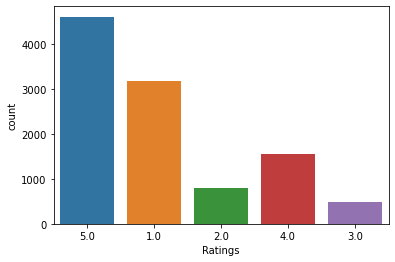

In [24]:
sns.countplot(rat['Ratings'])

In [25]:
# The datatypes of column
rat.dtypes

Reviews    object
Ratings    object
dtype: object

In [26]:
#Since it is of object datatype. we have to change it into float and then int
rat["Ratings"]=rat["Ratings"].astype(float)

In [32]:
rat["Ratings"].value_counts()

5.0    4616
1.0    3180
4.0    1563
2.0     788
3.0     481
Name: Ratings, dtype: int64

In [38]:
rat.dropna(inplace=True)

In [39]:
rat["Ratings"].dtypes

dtype('float64')

In [40]:
rat.shape

(10588, 2)

In [42]:
rat["Ratings"]=rat["Ratings"].astype(int)

In [45]:
#The datatype is perfect now
rat.sample(5)

Reviews  Ratings
11242  This monitor fraud with us, Because this monit...        1
11112  As the WFH became the new normal, I wanted an ...        5
3812   Great smartwatch launched by TIMEX GroupPros:1...        5
9769                                        Best product        5
10361  I have been using this for the last 1 month fo...        4

In [46]:
#The ratio of ratings present in dataset

print ('5 star ratio = ',round(len(rat[rat['Ratings']==5])/len(rat.Ratings),2)*100,'%')
print("\n")
print ('4 star ratio = ',round(len(rat[rat['Ratings']==4])/len(rat.Ratings),2)*100,'%')
print("\n")
print ('3 star ratio = ',round(len(rat[rat['Ratings']==3])/len(rat.Ratings),2)*100,'%')
print("\n")
print ('2 star ratio = ',round(len(rat[rat['Ratings']==2])/len(rat.Ratings),2)*100,'%')
print("\n")
print ('1 star ratio = ',round(len(rat[rat['Ratings']==1])/len(rat.Ratings),2)*100,'%')


5 star ratio =  43.0 %


4 star ratio =  15.0 %


3 star ratio =  5.0 %


2 star ratio =  7.000000000000001 %


1 star ratio =  30.0 %


In [47]:
#New column for length of reviews

rat['length']=rat.Reviews.str.len()
rat.head(5)

Reviews  Ratings  length
0  This is best thing you can get at this price f...        5    2025
1  Best camera, very good battery life, eat body ...        5     103
2  3rd class front camera. 32 MP front camera n l...        1     139
3  Lets just begin with the obvious. This phone's...        1    1474
4  The phone was wrapped in dust. Although it was...        1     824

In [48]:
rat['length'].dtype

dtype('int64')

In [49]:
#convert all Reviews to lower case

rat['Reviews']=rat['Reviews'].str.lower()

In [50]:
rat

Reviews  Ratings  length
0      this is best thing you can get at this price f...        5    2025
1      best camera, very good battery life, eat body ...        5     103
2      3rd class front camera. 32 mp front camera n l...        1     139
3      lets just begin with the obvious. this phone's...        1    1474
4      the phone was wrapped in dust. although it was...        1     824
...                                                  ...      ...     ...
11823  reviewing after a month of use, 60hz 1080p dis...        5     680
11824  that's my 15.6 inch laptop next to this monito...        5     264
11825  best for working don't purchase for gaming but...        5     109
11826  this is a superb monitor, with good quality an...        5     301
11827  i bought this 27" inch zebronics monitor for t...        5     113

[10588 rows x 3 columns]

In [23]:
#! pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

In [24]:
#! pip install spacy==2.2.3
#! python -m spacy download en_core_web_sm
#! pip install beautifulsoup4==4.9.1
#! pip install textblob==0.15.3

### Data Cleaning

In [51]:
# let us the import the required library and clean the text for further usage in machine learning

import preprocess_kgptalkie as ps
import re

In [52]:
#User defined function

def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [53]:
#cleaning data
rat['Reviews']=rat['Reviews'].apply(lambda x: get_clean(x))

In [54]:
rat.sample(5)

Reviews  Ratings  length
5744   a very good smart watch other established bran...        5     138
10531  this is a superb monitor with good quality and...        5     301
7968   ordered on 20 may 2020 received on time on 23r...        5     240
1309   what 13k priced phone with snapdragon 450 proc...        1     901
352    phone is good but lready used facebook messeng...        1     258

In [55]:
rat.head()

Reviews  Ratings  length
0  this is best thing you can get at this price f...        5    2025
1  best camera very good battery life eat body ma...        5     103
2  3rd class front camera 32 mp front camera and ...        1     139
3  lets just begin with the obvious this phones q...        1    1474
4  the phone was wrapped in dust although it was ...        1     824

In [56]:
#we can try using regular expression method also to make sure the data is cleaned

# Regular Expression

we have to remove regular expression and punctuations

In [57]:
#Replace email address with email
rat['Reviews']=rat['Reviews'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','email address')

In [58]:
rat.head()

Reviews  Ratings  length
0  this is best thing you can get at this price f...        5    2025
1  best camera very good battery life eat body ma...        5     103
2  3rd class front camera 32 mp front camera and ...        1     139
3  lets just begin with the obvious this phones q...        1    1474
4  the phone was wrapped in dust although it was ...        1     824

In [59]:
#replace URLS with webaddress

rat['Reviews']=rat['Reviews'].str.replace(r'^https\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [60]:
rat.head()

Reviews  Ratings  length
0  this is best thing you can get at this price f...        5    2025
1  best camera very good battery life eat body ma...        5     103
2  3rd class front camera 32 mp front camera and ...        1     139
3  lets just begin with the obvious this phones q...        1    1474
4  the phone was wrapped in dust although it was ...        1     824

In [61]:
#replace money symbol with 'moneysymp' (£ Can be typed using windows+. key) 

rat['Reviews']=rat['Reviews'].str.replace(r'£|\$','rupees')

In [62]:
rat.head()

Reviews  Ratings  length
0  this is best thing you can get at this price f...        5    2025
1  best camera very good battery life eat body ma...        5     103
2  3rd class front camera 32 mp front camera and ...        1     139
3  lets just begin with the obvious this phones q...        1    1474
4  the phone was wrapped in dust although it was ...        1     824

In [63]:
#Replace 10 digit phone numbers (formats include paranthesis,spaces,no spaces,dashes) with phone number

rat['Reviews']=rat['Reviews'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phone number')

In [64]:
rat.head()

Reviews  Ratings  length
0  this is best thing you can get at this price f...        5    2025
1  best camera very good battery life eat body ma...        5     103
2  3rd class front camera 32 mp front camera and ...        1     139
3  lets just begin with the obvious this phones q...        1    1474
4  the phone was wrapped in dust although it was ...        1     824

In [65]:
#Replace numbers with number

rat['Reviews']=rat['Reviews'].str.replace(r'\d+(\.\d+)?','number')

In [66]:
#Remove punctuation

rat['Reviews']=rat['Reviews'].str.replace(r'[^\w\d\s]',' ')

In [67]:
#Replace whitespace between terms with a single space

rat['Reviews']=rat['Reviews'].str.replace(r'\s+',' ')

In [68]:
#Remove leading and twisting white space

rat['Reviews']=rat['Reviews'].str.replace(r'^\s+|\s+?$',' ')

In [69]:
rat.head()

Reviews  Ratings  length
0  this is best thing you can get at this price f...        5    2025
1  best camera very good battery life eat body ma...        5     103
2  numberrd class front camera number mp front ca...        1     139
3  lets just begin with the obvious this phones q...        1    1474
4  the phone was wrapped in dust although it was ...        1     824

In [70]:
#to remove 
import re 

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [71]:
rat["Reviews"]=rat["Reviews"].apply(lambda x: deEmojify(x))

In [72]:
#Remove stopwords

import string
import nltk
from nltk.corpus import stopwords
stp=set(stopwords.words('english')+['u','ã','ur','4','2','im','dont','doin','ure','á','â','ä','å','de'])
rat['Reviews']=rat['Reviews'].apply(lambda x:' '.join(term for term in x.split() if term not in stp))

In [73]:
#New column (clean_length) after punctuations stopwords removal

rat['clean_length']=rat.Reviews.str.len()

In [74]:
rat

Reviews  Ratings  length  \
0      best thing get price reputed brand made india ...        5    2025   
1      best camera good battery life eat body materia...        5     103   
2      numberrd class front camera number mp front ca...        1     139   
3      lets begin obvious phones quality meet claims ...        1    1474   
4      phone wrapped dust although seal packed still ...        1     824   
...                                                  ...      ...     ...   
11823  reviewing month use numberhz numberp display s...        5     680   
11824  number inch laptop next monitor helpful office...        5     264   
11825  best working purchase gaming best working valu...        5     109   
11826  superb monitor good quality cheap price tag pi...        5     301   
11827  bought number inch zebronics monitor trending ...        5     113   

       clean_length  
0              1401  
1                92  
2               126  
3              1029  
4               564  
...             ...  
11823           428  
11824           143  
11825            76  
11826           203  
11827            84  

[10588 rows x 4 columns]

In [75]:
#Total length removal done

print('original length',rat.length.sum())
print('clean length',rat.clean_length.sum())

original length 5928763
clean length 4174393


##### Reviews Distribution Before cleaning

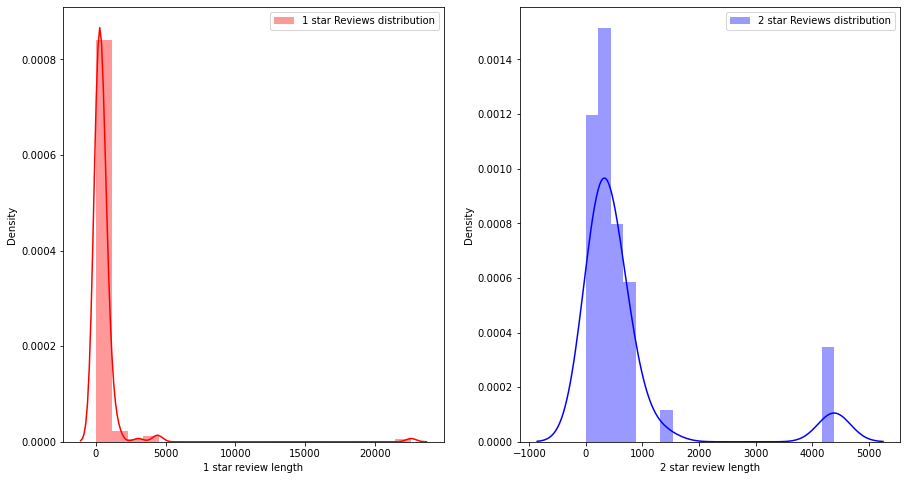

In [76]:
f,ax = plt.subplots(1,2,figsize=(15,8))
#1 star
sns.distplot(rat[rat['Ratings']==1]['length'],bins=20,ax=ax[0],label='1 star Reviews distribution',color='r')
ax[0].set_xlabel('1 star review length')
ax[0].legend()

#2 star
sns.distplot(rat[rat['Ratings']==2]['length'],bins=20,ax=ax[1],label='2 star Reviews distribution',color='b')
ax[1].set_xlabel('2 star review length')
ax[1].legend()


plt.show()

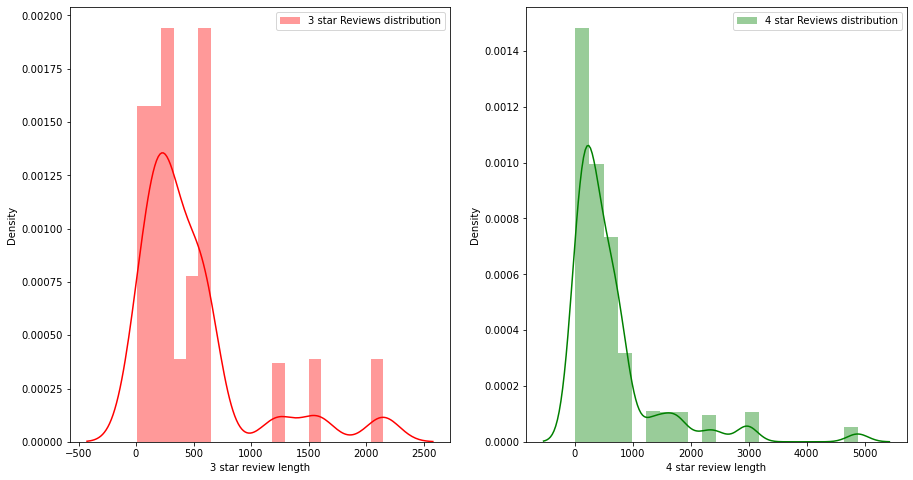

In [77]:
f,ax = plt.subplots(1,2,figsize=(15,8))
#3 star
sns.distplot(rat[rat['Ratings']==3]['length'],bins=20,ax=ax[0],label='3 star Reviews distribution',color='r')
ax[0].set_xlabel('3 star review length')
ax[0].legend()

#4 star
sns.distplot(rat[rat['Ratings']==4]['length'],bins=20,ax=ax[1],label='4 star Reviews distribution',color='g')
ax[1].set_xlabel('4 star review length')
ax[1].legend()

plt.show()

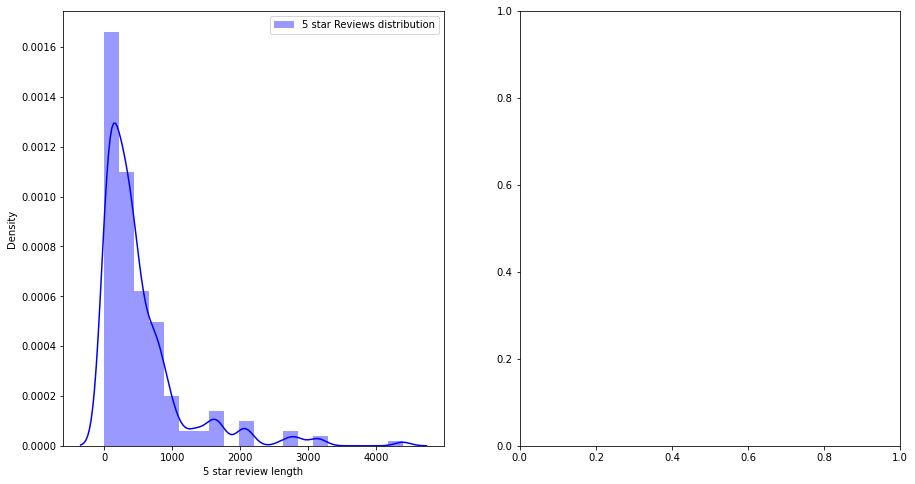

In [78]:
f,ax = plt.subplots(1,2,figsize=(15,8))


#5 star
sns.distplot(rat[rat['Ratings']==5]['length'],bins=20,ax=ax[0],label='5 star Reviews distribution',color='b')
ax[0].set_xlabel('5 star review length')
ax[0].legend()

plt.show()

##### Reviews Distribution After cleaning

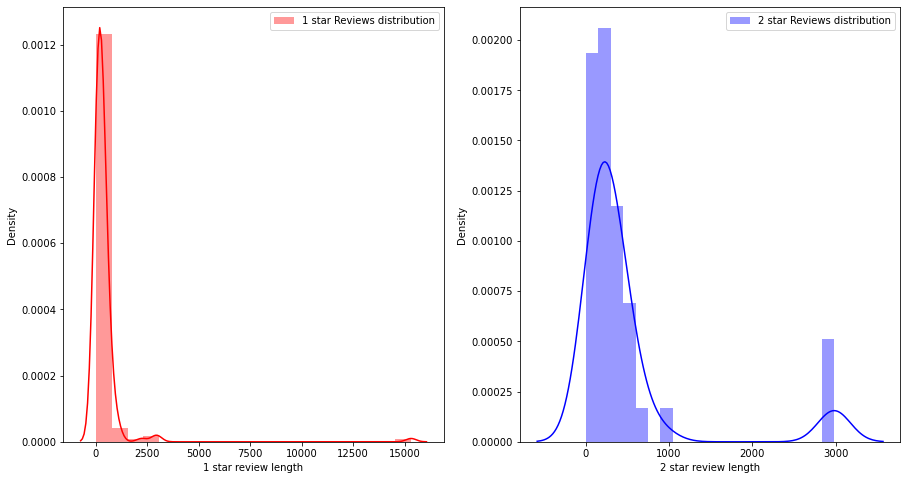

In [79]:
f,ax = plt.subplots(1,2,figsize=(15,8))
#1 star
sns.distplot(rat[rat['Ratings']==1]['clean_length'],bins=20,ax=ax[0],label='1 star Reviews distribution',color='r')
ax[0].set_xlabel('1 star review length')
ax[0].legend()

#2 star
sns.distplot(rat[rat['Ratings']==2]['clean_length'],bins=20,ax=ax[1],label='2 star Reviews distribution',color='b')
ax[1].set_xlabel('2 star review length')
ax[1].legend()


plt.show()

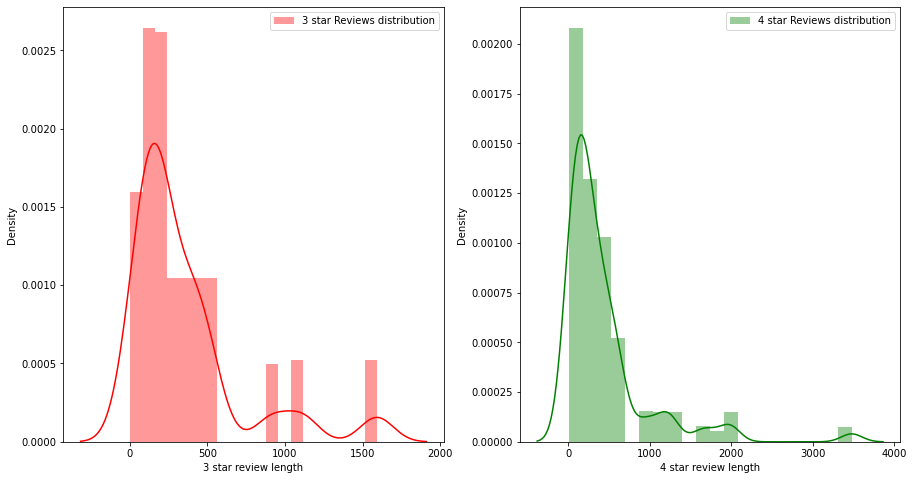

In [80]:
f,ax = plt.subplots(1,2,figsize=(15,8))
#3 star
sns.distplot(rat[rat['Ratings']==3]['clean_length'],bins=20,ax=ax[0],label='3 star Reviews distribution',color='r')
ax[0].set_xlabel('3 star review length')
ax[0].legend()

#4 star
sns.distplot(rat[rat['Ratings']==4]['clean_length'],bins=20,ax=ax[1],label='4 star Reviews distribution',color='g')
ax[1].set_xlabel('4 star review length')
ax[1].legend()

plt.show()

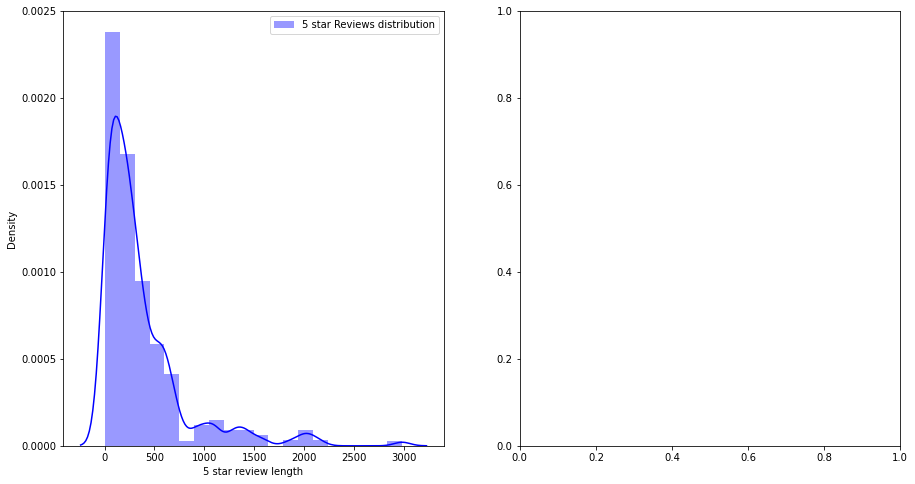

In [81]:
f,ax = plt.subplots(1,2,figsize=(15,8))


#5 star
sns.distplot(rat[rat['Ratings']==5]['clean_length'],bins=20,ax=ax[0],label='5 star Reviews distribution',color='b')
ax[0].set_xlabel('5 star review length')
ax[0].legend()

plt.show()

This is how the density of data available after cleaning

# Word cloud - Data visualization

Let us try word cloud to show us the important word corresponding each rating 

In [82]:
#importing lib 
from wordcloud import WordCloud #importing library

In [83]:
#defining word cloud for 5 star rating
fivestar=rat['Reviews'][rat['Ratings']==5]

fivestar_cloud=WordCloud(width=700,height=500,background_color="white",max_words=20).generate(' '.join(fivestar))

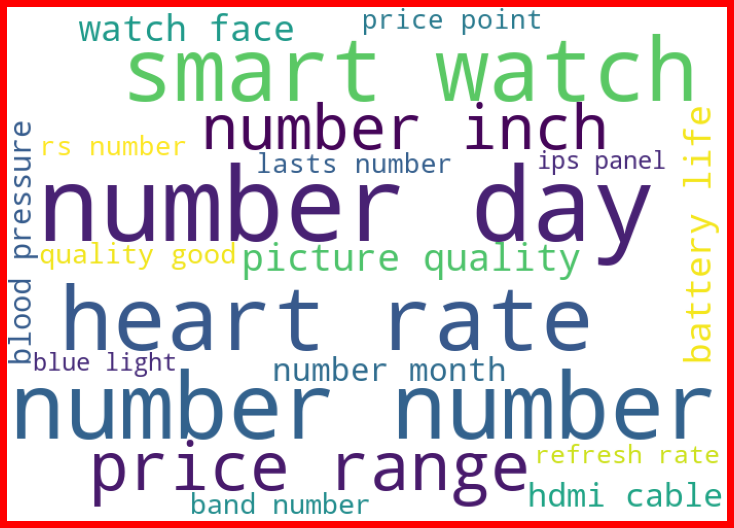

In [84]:
#Plotting figure

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fivestar_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

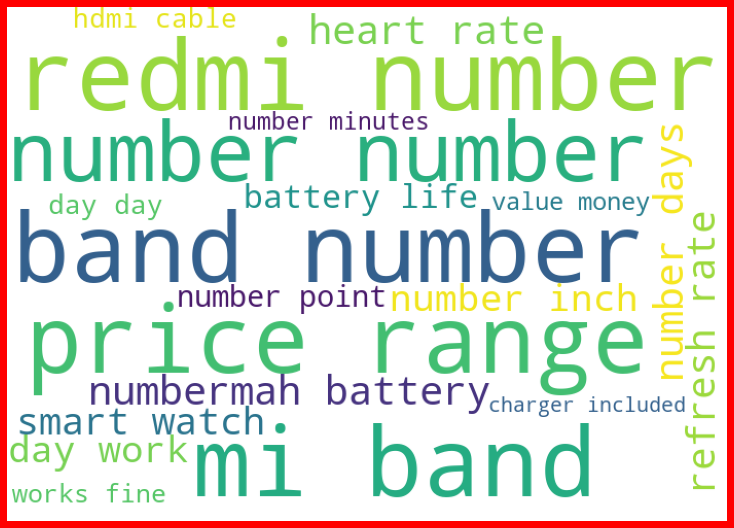

In [85]:
#similarily for 4 star 

star=rat['Reviews'][rat['Ratings']==4]

star_cloud=WordCloud(width=700,height=500,background_color="white",max_words=20).generate(' '.join(star))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(star_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

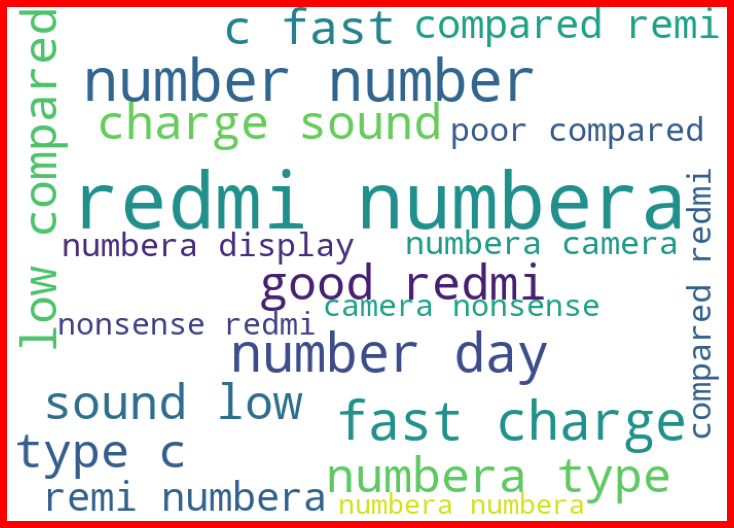

In [86]:
#similarily for 3 star 

star=rat['Reviews'][rat['Ratings']==3]

star_cloud=WordCloud(width=700,height=500,background_color="white",max_words=20).generate(' '.join(star))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(star_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

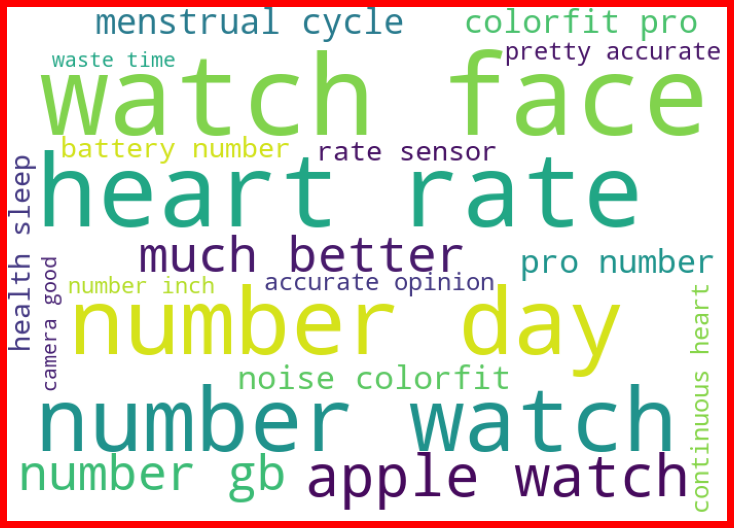

In [87]:
#similarily for 2 star 

star=rat['Reviews'][rat['Ratings']==2]

star_cloud=WordCloud(width=700,height=500,background_color="white",max_words=20).generate(' '.join(star))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(star_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

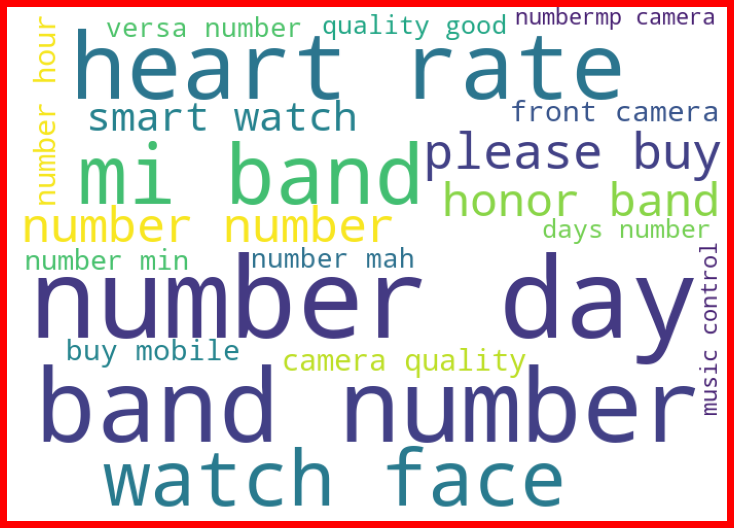

In [88]:
#similarily for 1 star 

star=rat['Reviews'][rat['Ratings']==1]

star_cloud=WordCloud(width=700,height=500,background_color="white",max_words=20).generate(' '.join(star))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(star_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [89]:
#MODEL BUILDING #required libraries

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier


In [90]:
#Changing text into vectors and algorithm initializing

tf_vec=TfidfVectorizer(max_features=20000,ngram_range=(1,5),analyzer='char')
naive=MultinomialNB(alpha=0.6)
SVC=LinearSVC()
rf=RandomForestClassifier(n_estimators=100)
features=tf_vec.fit_transform(rat['Reviews'])

In [91]:
#initializing X and y

X=features
y=rat['Ratings']

In [92]:
#Model algorithm 1
#Train and Test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
naive.fit(X_train,y_train)
y_pred=naive.predict(X_test)

In [93]:
#scoring #accuracy

print('Final Score => ',accuracy_score(y_test,y_pred))

Final Score =>  0.8729933899905571


In [94]:
# Let us see other  metrics

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.91      0.83      0.86       667
           2       0.90      0.86      0.88       146
           3       0.93      0.52      0.66        97
           4       0.96      0.80      0.87       293
           5       0.83      0.97      0.89       915

    accuracy                           0.87      2118
   macro avg       0.90      0.79      0.83      2118
weighted avg       0.88      0.87      0.87      2118



In [95]:
print(confusion_matrix(y_test,y_pred))

[[551   2   4   7 103]
 [  5 125   0   4  12]
 [ 24   0  50   0  23]
 [ 13   0   0 235  45]
 [ 15  12   0   0 888]]


In [96]:
#Model algorithm 2
#Train and Test  
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
SVC.fit(X_train,y_train)


LinearSVC()

In [97]:
y_pred=SVC.predict(X_test)

In [98]:
#scoring #accuracy

print('Final Score => ',accuracy_score(y_test,y_pred))

Final Score =>  0.93342776203966


In [99]:
# Let us see other  metrics

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.93      0.92      0.92       667
           2       0.88      0.94      0.91       146
           3       1.00      0.76      0.87        97
           4       0.94      0.96      0.95       293
           5       0.94      0.95      0.94       915

    accuracy                           0.93      2118
   macro avg       0.94      0.91      0.92      2118
weighted avg       0.93      0.93      0.93      2118



In [100]:
#Model algorithm 3
#Train and Test  
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
rf.fit(X_train,y_train)


RandomForestClassifier()

In [101]:
y_pred=rf.predict(X_test)

In [102]:
#scoring #accuracy

print('Final Score => ',accuracy_score(y_test,y_pred))

Final Score =>  0.9329556185080264


In [103]:
# Let us see other  metrics

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.92      0.92      0.92       667
           2       0.88      0.94      0.91       146
           3       1.00      0.76      0.87        97
           4       0.93      0.97      0.95       293
           5       0.94      0.95      0.94       915

    accuracy                           0.93      2118
   macro avg       0.94      0.91      0.92      2118
weighted avg       0.93      0.93      0.93      2118



In [104]:
# Let us check with new set of data 

x="This product is really good, i like it"
x=get_clean(x)
vec=tf_vec.transform([x])
SVC.predict(vec)

array([5])

In [106]:
# Let us check with new set of data 

x="camera quality is worst. Please don't buy it"
x=get_clean(x)
vec=tf_vec.transform([x])
SVC.predict(vec)

array([1])

Therefore it is giving 5 star rating for good reviews text and 1 start rating for bad reviews. The model is working well with 93.33% accuracy.

# SVC IS CHOSEN AS FINAL MODEL WITH 93% Accuracy

Therefore model can predict Rating with 93% accuracy which is pretty good. It can be improved we can scrape  more equal number of data

# Thus, Model is created Succesfully